In [73]:
import matplotlib
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

from IPython.display import Image
from matplotlib import pyplot as plt

In [2]:
import os
IMG_FOLDER = 'img'

os.makedirs(IMG_FOLDER, exist_ok=True)

# Simple function

- Сгенерируйте данные для функции $y = x^3$. Возьмите числа от 0 до 99.
- Отобразите данные на графике. Обозначьте кажду точку в виде красного "+"
- Подпишите оси
- Дайте название графику

## Simple Matplotlib plot

In [6]:
n_points = 100

data = np.arange(n_points) ** 3

*Пример*

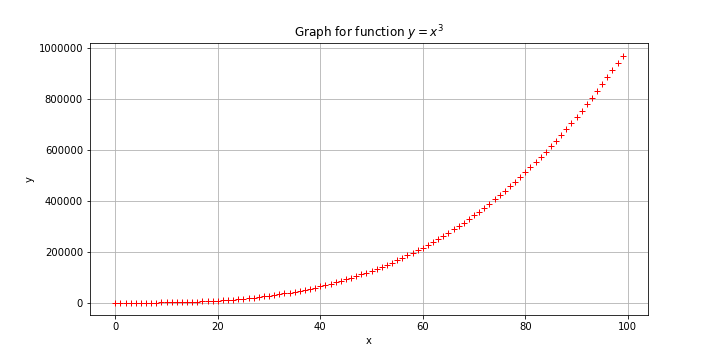

In [103]:
Image(filename=os.path.join(IMG_FOLDER,'task0_1.png'))

*Решение*

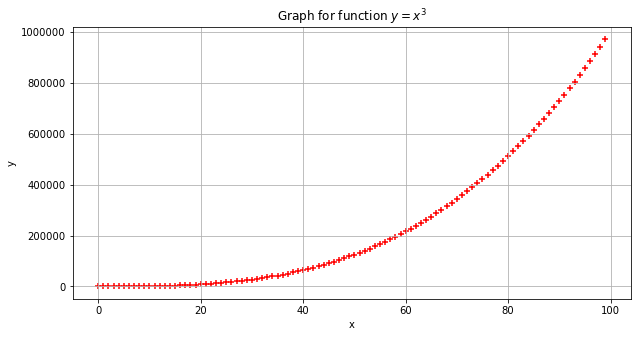

In [101]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(n_points), data, marker='+', c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph for function $y = x^3$')
plt.ticklabel_format(scilimits=(1, 7))
plt.grid()
plt.show()

или

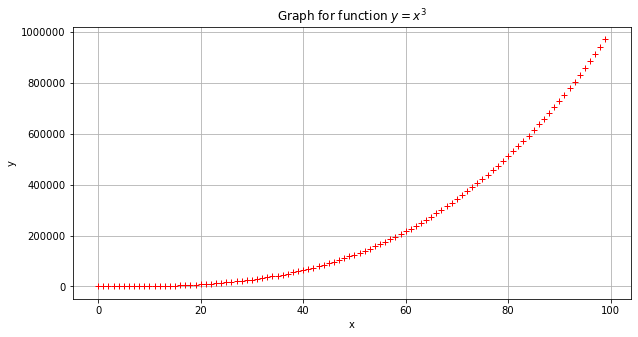

In [102]:
plt.figure(figsize=(10, 5))

plt.plot(data, 'r+')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph for function $y = x^3$')
plt.ticklabel_format(style='plain')

# plt.savefig(os.path.join(IMG_FOLDER, 'task0_1.png'))
plt.show()

Заметьте, что числа на оси y перевелись в "научную нотацию". Как это можно поправить?

## Plot two lines

Представьте что вы сделали модель и предсказали еще 10 точек для вашего графика выше. Вы имеете точные значения и оценки на их вероятные верхние и нижние границы.

Постройте график, где сначала красным цветом будут показываться ваши "тренировочные" данные, а дальше желтым -- "предсказания". Светло-желтым закрасьте области между верхней и нижней границей для каждой точки, подпишите ее как CI в графике

In [10]:
preds_size = 10

preds = np.arange(len(data), len(data) + preds_size) ** 3

all_data = np.concatenate((data, preds))
stds = np.array([np.std(all_data[i - 50: i]) for i in range(len(data), len(data) + preds_size)])

l_bounds = preds - stds
h_bounds = preds + stds

*Пример*

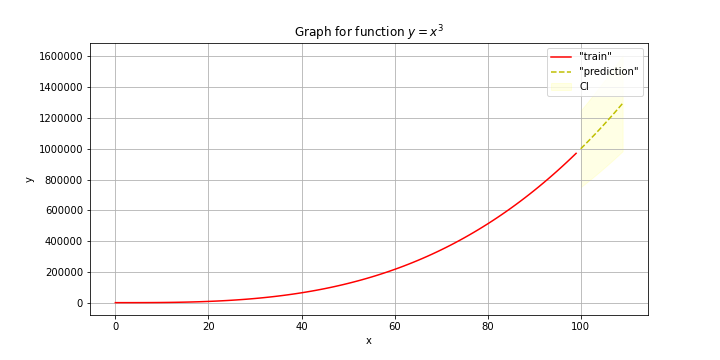

In [11]:
Image(filename=os.path.join(IMG_FOLDER,'task0_2.png'))

*Решение*

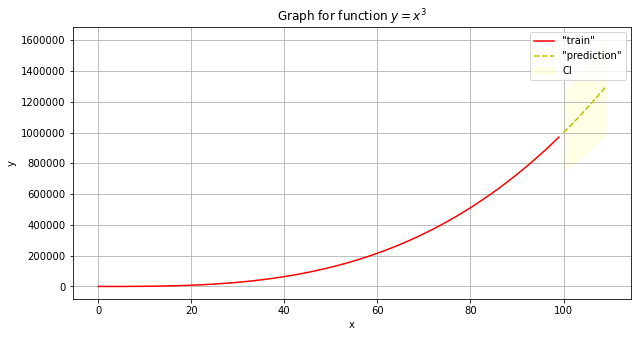

In [12]:
train_range = np.arange(len(data))
preds_range = np.arange(len(data), len(data) + preds_size)

plt.figure(figsize=(10, 5))

plt.plot(train_range, data, color='red', label='"train"')
plt.plot(preds_range, preds, '--y', label='"prediction"')

plt.fill_between(preds_range, l_bounds, h_bounds, alpha=0.1, color='yellow', label='CI')

plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph for function $y = x^3$')
plt.ticklabel_format(style='plain')

# plt.savefig(os.path.join(IMG_FOLDER, 'task0_2.png'))
plt.show()

## Using Plotly

**Давайте теперь сделаем интерактивный график в plotly**

https://plotly.com/python/marker-style/#using-a-custom-marker

*Пример*

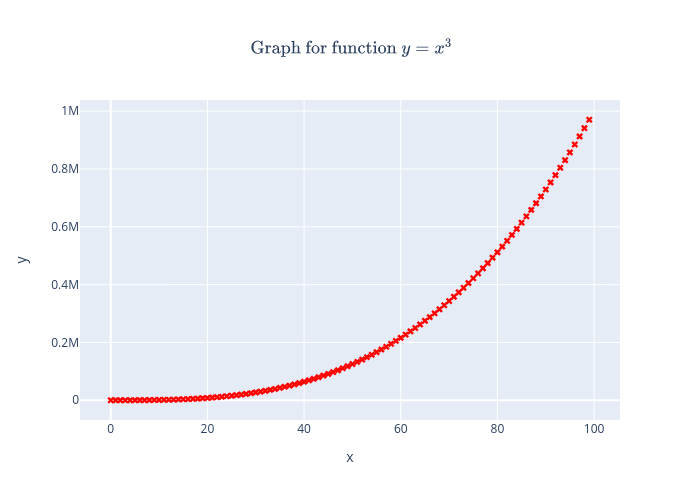

In [13]:
Image(filename=os.path.join(IMG_FOLDER,'task0_1_plotly.png'))

*Решение*

In [1]:
# your code

In [15]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task0_1_plotly.png'))

**Добавим "предикты" с интервалами по аналогии с matplotlib**

*Пример*

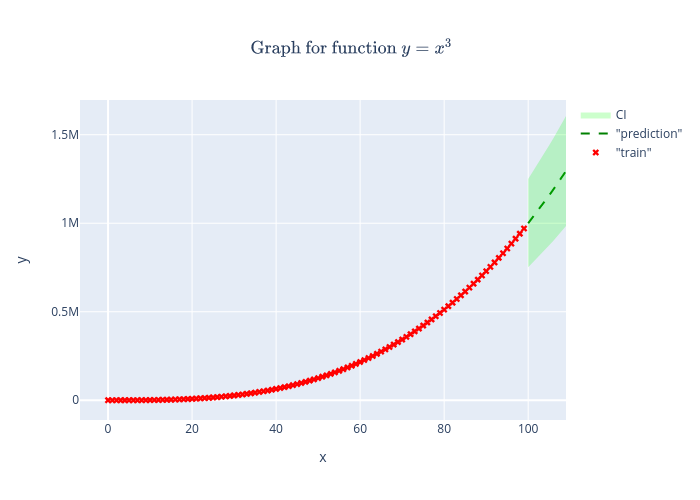

In [16]:
Image(filename=os.path.join(IMG_FOLDER,'task0_2_plotly.png'))

*Решение*

In [2]:
# your code

In [18]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task0_2_plotly.png'))

# Figure for artificial data. Subplots. Line plot. Scatter plot

In [19]:
np.random.seed(42)

df = pd.DataFrame(data={'column_a':np.random.randint(0, 100, 30),
                        'column_b':np.random.randint(0, 100, 30),
                        'column_c':np.random.randint(0, 100, 30)})
df.head()

,column_a,column_b,column_c
0,51,90,91
1,92,58,59
2,14,41,70
3,71,91,43
4,60,59,7


Постройте два графика в одной большой фигуре. 
Назовите фигуру "Task 1", используйте шрифт размера 20.

- Пошарьте ось x между графиками. Назовите ее "index".

- На первом графике:
    - нарисуйте две линии по данным "column_a", и "column_b";
    - сделайте "легенду" в верхней части графика, обозначьте оранжевым цветом данные из колонки a, синим -- данные из колонки b;
    - дайте название оси y: value;
    - назовите график "Line plots for column_a, column_b"

- На втором графике:
    - покажите зелеными точками данные из третьей колонки;
    - сделайте легенду в правом нижнем углу
    - назовите график "Scatter plot for column_c";

- Сохраните получившийся график в формат .png с названием 'task1_1.png' 


https://matplotlib.org/stable/tutorials/colors/colors.html

*Пример*

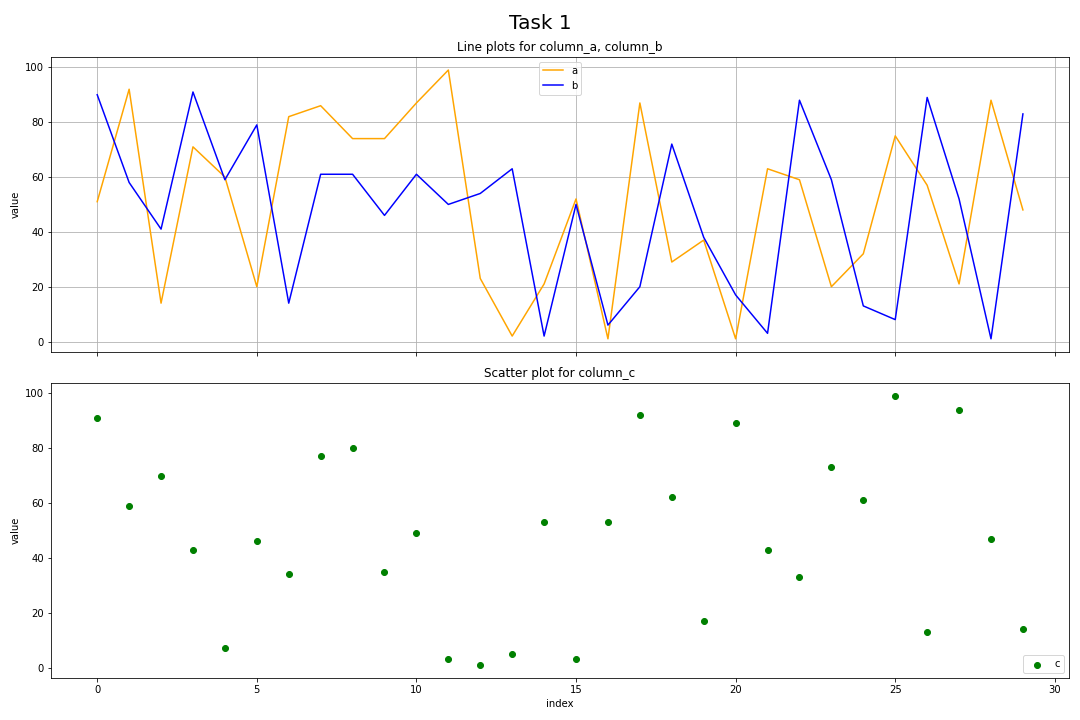

In [47]:
Image(filename=os.path.join(IMG_FOLDER,'task1.png'))

*Решение*

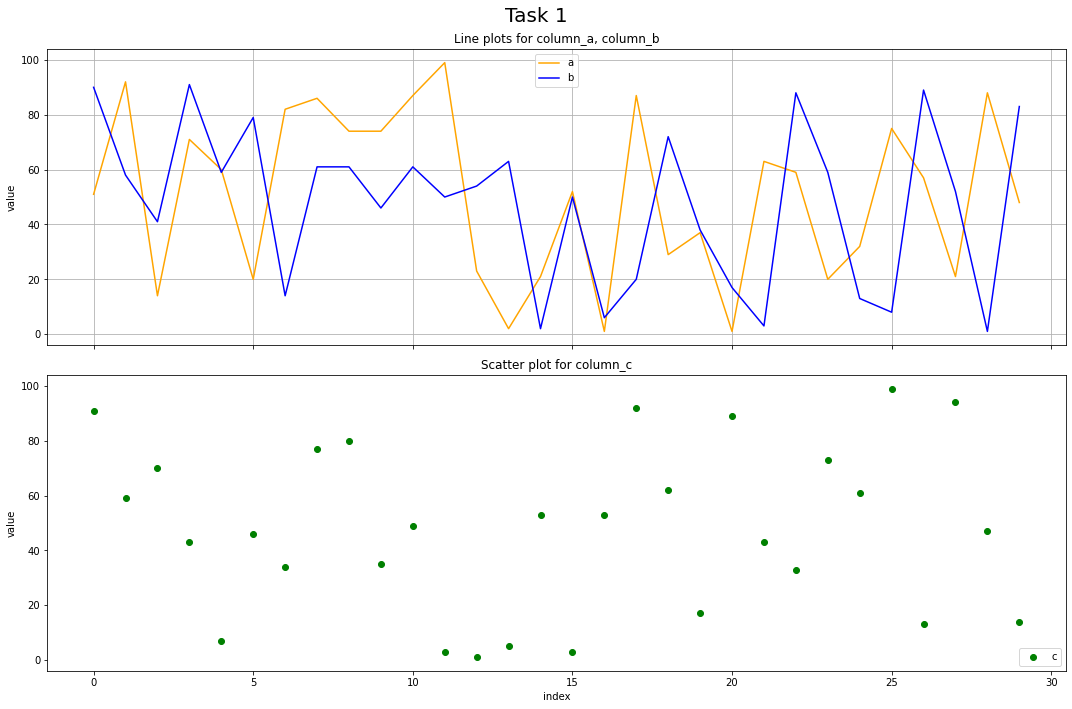

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

ax[0].plot(df['column_a'], label='a', color='orange')
ax[0].plot(df['column_b'], label='b', color=(0, 0, 1))
ax[0].grid()
ax[0].legend(loc=9)
ax[0].set_title('Line plots for column_a, column_b')
ax[0].set_ylabel('value')


ax[1].scatter(df.index, df['column_c'], label='c', color='g')
ax[1].set_title('Scatter plot for column_c')
ax[1].legend(loc=4)
ax[1].set_xlabel('index')
ax[1].set_ylabel('value')


fig.suptitle('Task 1', fontsize=20)
fig.tight_layout()
fig.show()

In [21]:
# fig.savefig(os.path.join(IMG_FOLDER, 'task1.png'))

    Для цветов я люблю использовать такую штуку. Заранее назначить набор цветов в глобальную переменную, и "ходить" по ним в графиках. Вот так:
    
```Python
from itertools import cycle

COLORS = cycle(['b','g','r','c','m','y'])  # have different colors in complex plots across the notebook
...
ax.plot(..., color=next(COLORS))
...

```

## Bar plot

Для датафрейма выше постройте bar plots отдельно для данных из колонок a, b, c. Подпишите значения в каждом "столбике" (`ax.bar_label` может помочь)

PS для однотипных операций используйте циклы

In [22]:
from itertools import cycle
COLORS = cycle(['b','g','r','c','m','y'])

### Using Matplotlib

*Пример*

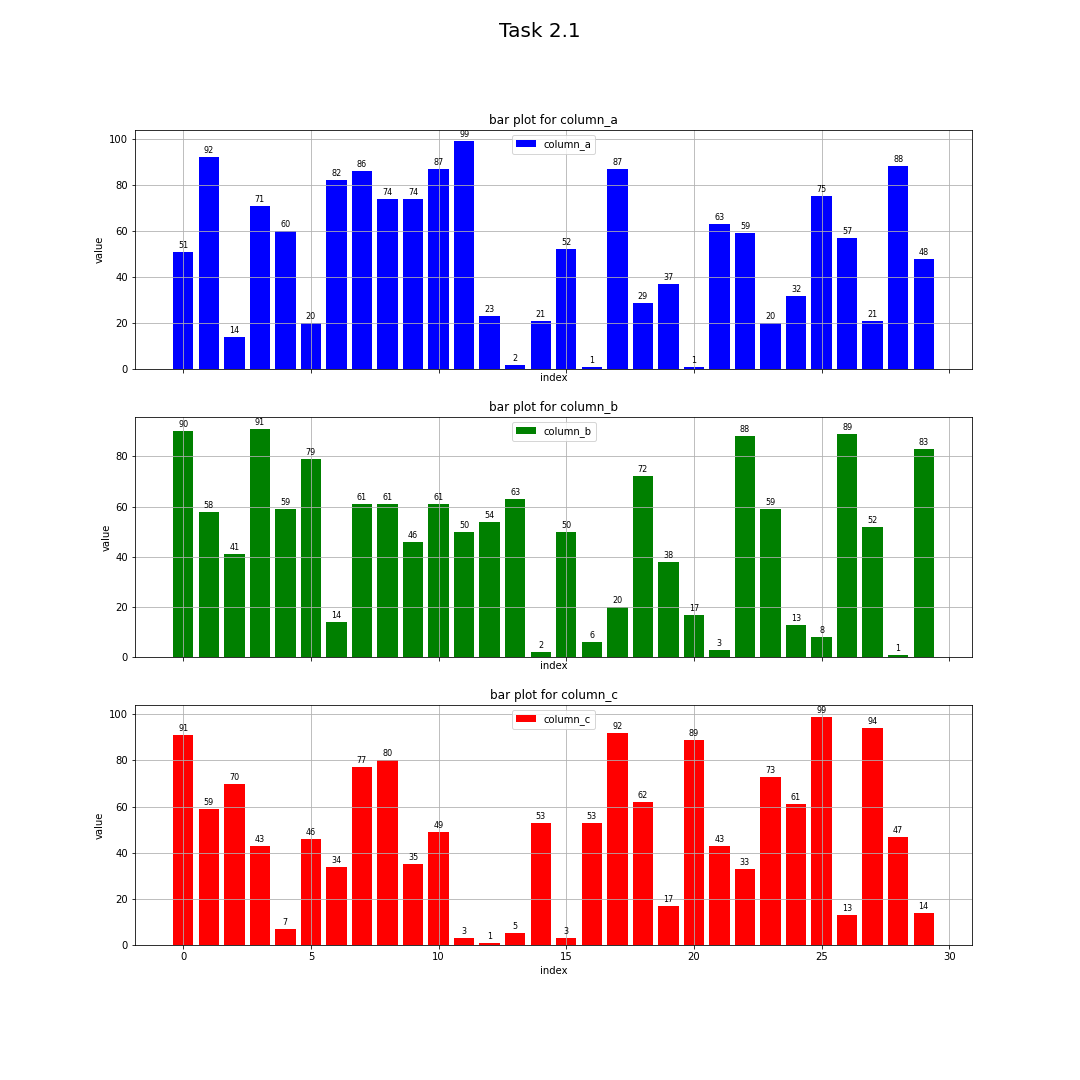

In [23]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1.png'))

*Решение*

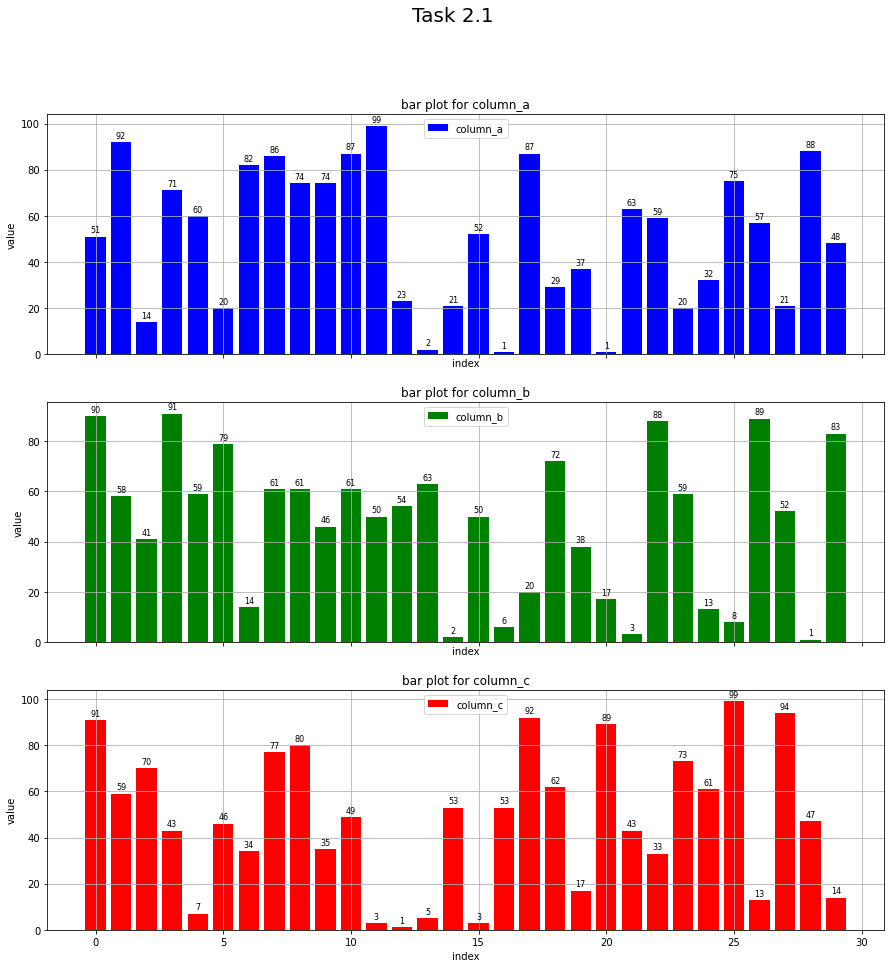

In [25]:
fig, ax = plt.subplots(df.shape[1], 1, figsize=(15, 15), sharex=True)

for i, column_name in enumerate(df.columns):
    axis = ax[i]
    axis.bar(df.index, df[column_name], label=column_name, color=next(COLORS))
    axis.legend(loc=9)
    axis.set_title(f'bar plot for {column_name}')
    axis.bar_label(axis.containers[0], label_type='edge', padding=2, fontsize=8)
    axis.set_ylabel('value')
    axis.set_xlabel('index')
    axis.grid()

fig.suptitle('Task 2.1', fontsize=20)
fig.show()

In [26]:
# fig.savefig(os.path.join(IMG_FOLDER, 'task2_1.png'))

**Также можно использовать df.plot от pandas**

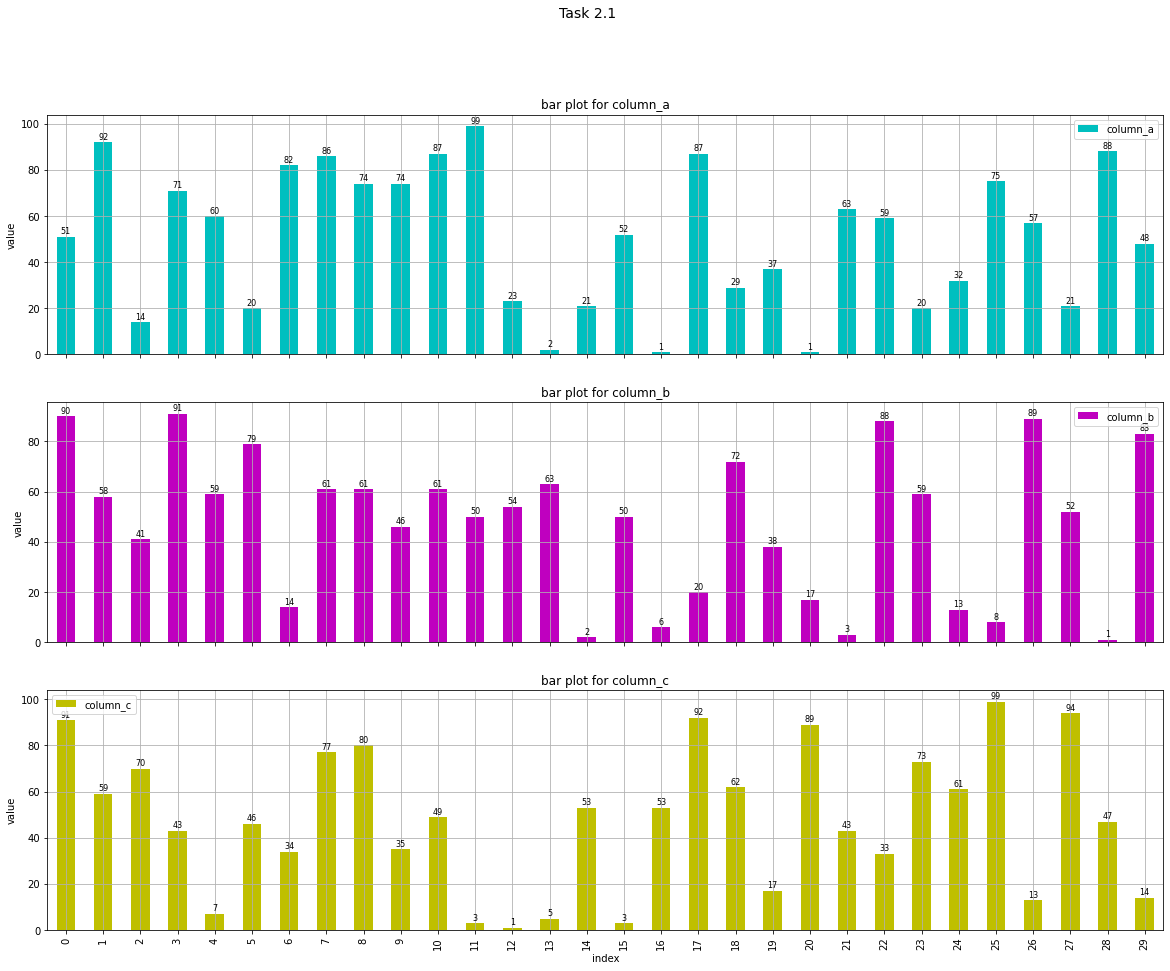

In [27]:
fig, ax = plt.subplots(df.shape[1], 1, figsize=(20, 15), sharex=True)

for i, column_name in zip(range(3), df.columns):
    df[column_name].plot(kind='bar',
                         title=f'bar plot for {column_name}',
                         xlabel='index',
                         ylabel='value',
                         legend=True,
                         grid=True,
                         ax=ax[i],
                         color=next(COLORS))
    ax[i].bar_label(ax[i].containers[0], label_type='edge', padding=1, fontsize=8)

fig.suptitle('Task 2.1', fontsize=14)
fig.show()

### Using Plotly

*Пример*

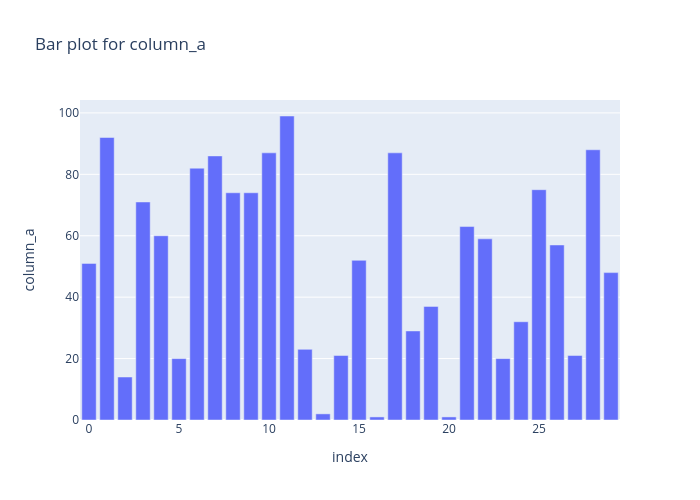

In [28]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1_plotly_1.png'))

*Решение*

In [3]:
# your code

In [30]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task2_1_plotly_1.png'))

**Попробуем отобразить все колонки сразу**

*Пример*

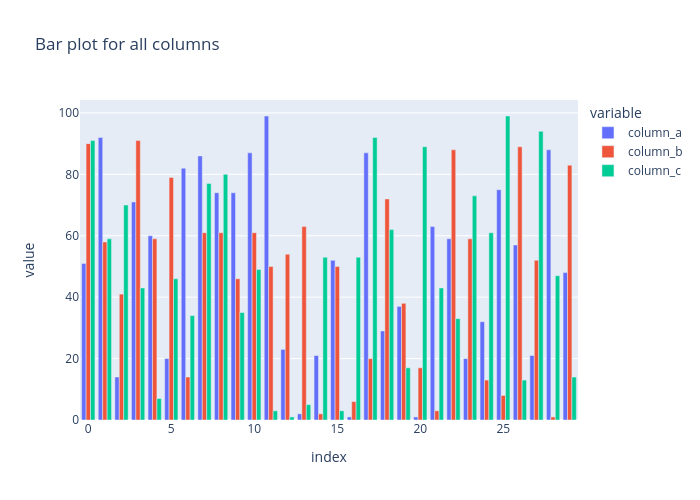

In [31]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1_plotly_2.png'))

*Решение*

In [4]:
# your code

In [33]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task2_1_plotly_2.png'))

## Stacked Bar Plot

### Using Matplotlib

**Выделение разных частей в колонках**

Сделайте bar plot по всем колонкам (суммы) и цветами укажите "вклад" каждой колонки

*Пример*

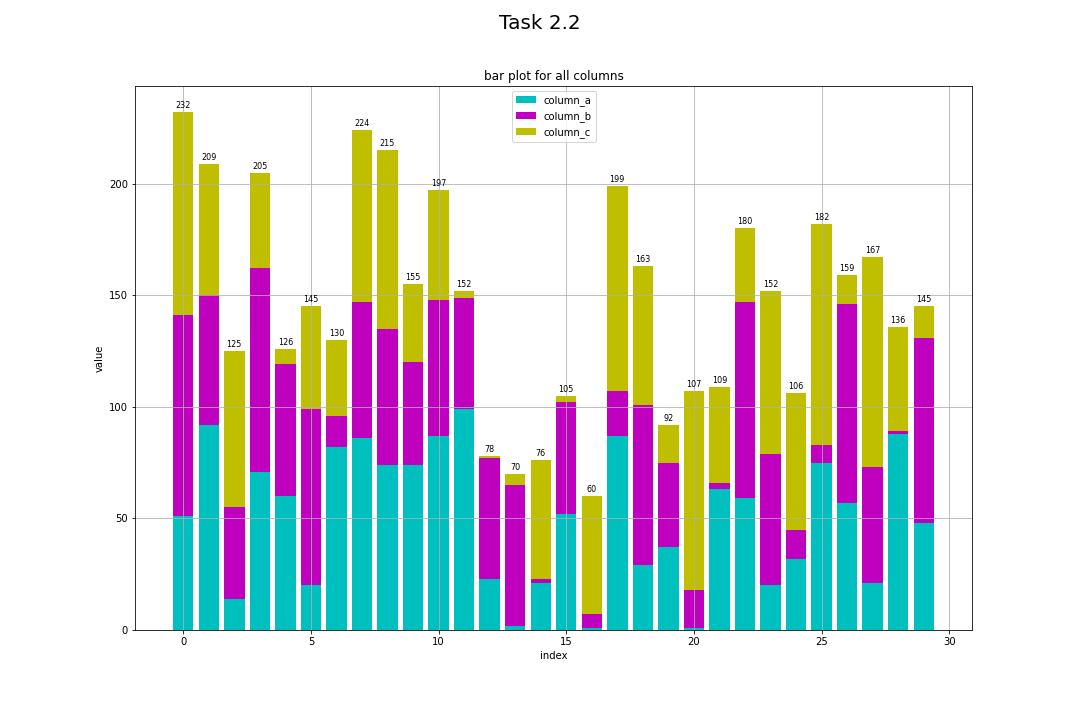

In [34]:
Image(filename=os.path.join(IMG_FOLDER,'task2_2.png'))

*Решение*

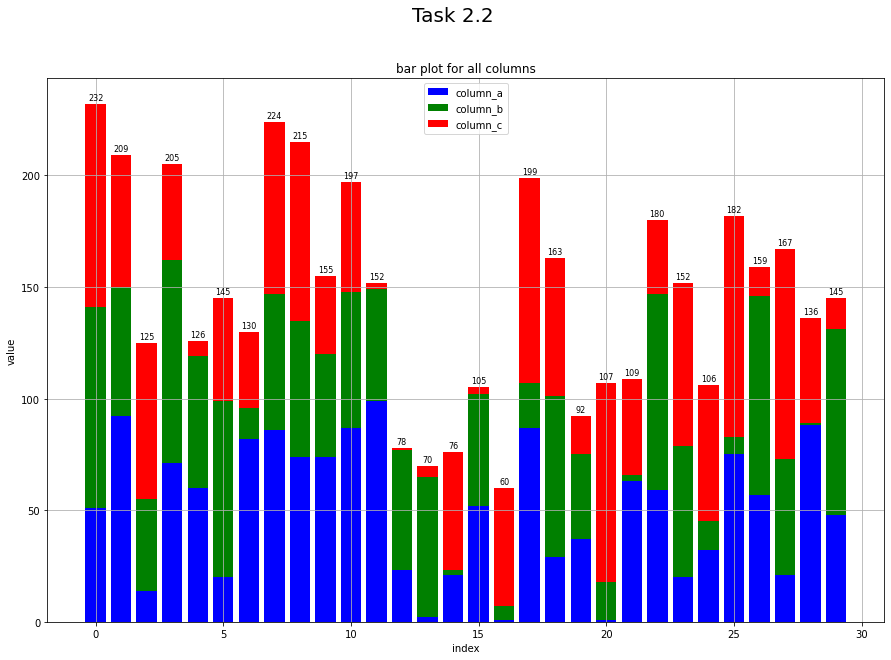

In [35]:
fig, axis = plt.subplots(1, 1, figsize=(15, 10), sharex=True)

cum = None
for column_name in df.columns:
    axis.bar(df.index, df[column_name], label=column_name, color=next(COLORS), bottom=cum)
    if cum is None:
        cum = df[column_name].copy()
    else:
        cum += df[column_name].copy()
    
axis.legend(loc=9)
axis.set_title(f'bar plot for all columns')
axis.bar_label(axis.containers[-1], label_type='edge', padding=2, fontsize=8)

axis.set_ylabel('value')
axis.set_xlabel('index')
axis.grid()

fig.suptitle('Task 2.2', fontsize=20)
fig.show()

Убедимся, что наши значение похожи на правду

In [36]:
df.sum(1).values

array([232, 209, 125, 205, 126, 145, 130, 224, 215, 155, 197, 152,  78,
        70,  76, 105,  60, 199, 163,  92, 107, 109, 180, 152, 106, 182,
       159, 167, 136, 145])

In [37]:
# fig.savefig(os.path.join(IMG_FOLDER, 'task2_2.png'))

### Using Plotly

#### Convert Matplotlib graph to Plotly

Давайте попробуем написать небольшой "маппер" из графика выше с использованием matplotlib в plotly!

In [38]:
axis

<AxesSubplot:title={'center':'bar plot for all columns'}, xlabel='index', ylabel='value'>

In [39]:
dir(axis)

['ArtistList',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_

In [41]:
axis.get_children()

 Text(0, 2, '232'),
 Text(0, 2, '209'),
 Text(0, 2, '125'),
 Text(0, 2, '205'),
 Text(0, 2, '126'),
 Text(0, 2, '145'),
 Text(0, 2, '130'),
 Text(0, 2, '224'),
 Text(0, 2, '215'),
 Text(0, 2, '155'),
 Text(0, 2, '197'),
 Text(0, 2, '152'),
 Text(0, 2, '78'),
 Text(0, 2, '70'),
 Text(0, 2, '76'),
 Text(0, 2, '105'),
 Text(0, 2, '60'),
 Text(0, 2, '199'),
 Text(0, 2, '163'),
 Text(0, 2, '92'),
 Text(0, 2, '107'),
 Text(0, 2, '109'),
 Text(0, 2, '180'),
 Text(0, 2, '152'),
 Text(0, 2, '106'),
 Text(0, 2, '182'),
 Text(0, 2, '159'),
 Text(0, 2, '167'),
 Text(0, 2, '136'),
 Text(0, 2, '145'),
 Text(0.5, 1.0, 'bar plot for all columns'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

In [5]:
# your code

#### Plotly express

*Пример*

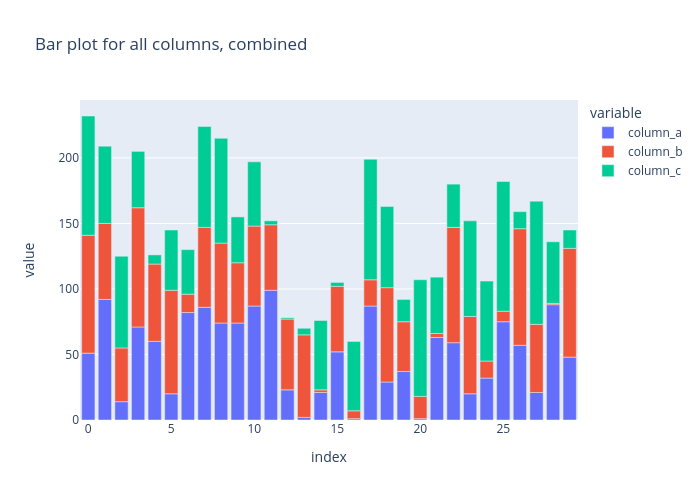

In [39]:
Image(filename=os.path.join(IMG_FOLDER,'task2_2_plotly.png'))

*Решение*

In [6]:
# your code

In [40]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task2_2_plotly.png'))

# Exploring Kaggle Dataset with Seaborn

Для практики покрутите [датасет](https://www.kaggle.com/datasets/thec03u5/fifa-18-demo-player-dataset), основанный на данных из игры FIFA 18

Скачать данные с сайта можно в веб-интерфейсе после регистрации. Также у Kaggle есть [интерфейс](https://github.com/Kaggle/kaggle-api) для работы с командной строкой.

Хорошо написанный тутор с визуализацией данных выше: 

- [Часть 1](https://www.kaggle.com/code/residentmario/faceting-with-seaborn)
- [Часть 2](https://www.kaggle.com/code/residentmario/multivariate-plotting/notebook) 